# Symbulate Documentation

# Multiple Random Variables and Joint Distributions

<a id='contents'></a>

  1. [**Defining multiple random variables:**](#def_mult_rand)
  1. [**Commonly used joint distributions:**](#common_joint_dist) 
  1. [**Defining independent random variables:**](#def_ind_ran)
  1. [**ampersand (&):**](#ampersand) Use **&** to simulate pairs (or tuples) of values 
  1. [**Plot:**](#plot) Use **.plot()** to display a scatterplot summary of the simulated values of two random variables.
  1. [**Random vectors:**](#rv)
  1. [**"Unpacking":**](#unpack)
  1. [**Marginal distributions:**](#marginal)
  1. [**Covariance:**](#cov) Use **.cov()** to compute the covariance between two random variables, or the covariance matrix for three or more random variables
  1. [**Correlation:**](#corr) Use **.corr()** to compute the correlation between two random variables, or the correlation matrix for three or more random variables
  1. [**Transformations:**](#transform)
  1. [**A caution about working with multiple random variables:**](#caution)

< [Commonly used random processes](common_random.html) | [Contents](index.html) | [Conditioning](conditioning.html) >

Instructions for downloading and installing Symbulate can be found [here](http://calpoly.edu/~dsun09/python.html).  During a session, be sure to import Symbulate using the following commands.
<a id='joint'></a>

In [1]:
from symbulate import *
%matplotlib inline

<a id='joint'></a>

<a id='def_mult_rand'></a>
## Defining multiple random variables

Many problems involve several random variables defined on the same probability space.  Of interest are properties of the *joint distribution* which describe the relationship between the random variables.   We define some notation and terminology in the case of two random variables $X$ and $Y$; analogous definitions are available for multiple random variables. 

Analogous to the [probability mass function](common_discrete.html#pmf) of a single discrete random variable, the *joint probability mass function* $p_{X,Y}$ of two discrete random variables $X$ and $Y$ defined on the same probability space is defined by:
$$
p_{X,Y}(x,y) = P(X = x, Y = y)
$$
A joint probability mass function is a probability distribution on $(x, y)$ pairs.

Analogous to the [probability density function](common_continuous.html#pdf) of a continuous random variable, the *joint probability density functon* $f_{X,Y}$ of two jointly continuous random variables $X$ and $Y$ defined on the same probability space satisfies, for any two-dimensional region $A$,
$$
P((X,Y) \in A) = \iint\limits_A f_{X,Y}(x,y)\,dx\, dy.
$$
A joint probability density function specifies a probability distribution on $(x, y)$ pairs.  Recall that for a continuous random variable $X$, [the density $f_X(x)$ at a point $x$ is not a probability](https://dlsun.github.io/symbulate/common.html#continuous).  Likewise, a joint conditional probability density function does represent joint probabilities.  Rather, $f_{X, Y}(x, y)$ is related to the probability that the $(X, Y)$ pair is "close to" $(x, y)$.
$$
P\left(x - h/2 < X < x + h/2\, ,\, y - h/2 < Y < y + h/2 \right)\, \approx\, h^2\, f_{X, Y}(x, y)
$$

Of course, it is also possible to have situations where one of $X$ and $Y$ is discrete and the other is continuous.

The *joint cumulative distribution function* $F_{X, Y}:\mathbb{R}^2\mapsto[0,1]$ of two random variables $X$ and $Y$ defined on the same probability space is defined as 
$$
F_{X,Y}(x,y) = P(X \leq x,Y \leq y)
$$

In the context of multiple random variables, the distribution of any single random variable is referred to as a *marginal distribution*.  Joint distributions fully specify the corresponding marginal distributions; however, the converse is not true (unless the [random variables are independent](#def_ind_ran).)

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls.

In [2]:
die = list(range(1, 6+1))
P = BoxModel(die, size = 2)
X = RV(P, sum)
Y = RV(P, max)

<a id='common_joint_dist'></a>
## Commonly used joint distributions

Recall that a RV can be defined by specifying its distribution directly.  Similarly, multiple RVs can be defined by specifying the joint distribution directly. Several commonly used [joint distributions](common_joint.html) are built in to Symbulate.  For example, a [multivariate normal distribution](common_joint.html#mvn) is a joint distribution parametrized by a mean vector and a covariance matrix.

In [3]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix)) # see below for notes on "unpacking"

Custom joint distributions can be specified using [ProbabilitySpace](probspace.html#probability_space).  For example, it is possible to [specify a joint distribution via conditional and marginal distributions](conditioning.html#conditional).

<a id='def_ind_ran'></a>
## Defining independent random variables

Intuitvely, a collection of random variables are *independent* if knowing the values of some does not influence the joint distribution of the others.  Random variables $X$ and $Y$ are independent if the joint distribution factors into the product of the  corresponding marginal distributions.  That is, for independent RVs the joint distribution is fully specified by the marginal distributions. Stated in terms of CDFs, random variables $X$ and $Y$ are independent if and only if for all $(x, y)$ pairs
$$
F_{X,Y}(x,y) = F_X(x) F_Y(y)
$$

Recall that a RV can be defined by specifying its distribution directly.  When dealing with multiple random variables it is common to specify the marginal distribution of each and assume independence.  In Symbulate, independence of distributions is represented by the asterisks `*`.  The `*` syntax reflects that under independence joints objects (i.e. cdf, pdf) are products of the corresponding marginal objects.

*Example.* Let $X$, $Y$, and $Z$ be independent, with $X$ having a Binomial(5, 0.5) distribution, $Y$ a Normal(0,1) distribution, and $Z$ a Uniform(0,1) distribution.

In [4]:
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0, 1) * Uniform(0, 1))  # see below for notes on "unpacking"

The product syntax emphasizes that the random variables are defined on the same probability space (a product space).  It is also possible to define each random variable separately and then use the `AssumeIndependent` command.  The following code is equivalent to the above code.  Either syntax has the effect of creating an unspecified probability space upon which random variables $X, Y, Z$ are defined via unspecified functions such that $X$, $Y$, and $Z$ are independent and have the specified marginal distributions.

In [5]:
X = RV(Binomial(5, 0.5))
Y = RV(Normal(0, 1))
Z = RV(Uniform(0, 1)) 
X, Y, Z = AssumeIndependent(X, Y, Z)

<a id='ampersand'></a>

### Ampersand (&)

Pairs of values of two random variables, or tuples of values of multiple random variables, can be simulated simultaneously using the ampersand **&**.  [Simulation tools](sim.html) like `.sim()`, `.tabulate()`, etc work as before.

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls

In [6]:
die = list(range(1, 6+1))
P = BoxModel(die, size = 2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).tabulate(normalize = True)

"(2, 1)",0.0291
"(3, 2)",0.0558
"(4, 2)",0.0289
"(4, 3)",0.0548
"(5, 3)",0.055
"(5, 4)",0.0555
"(6, 3)",0.0269
"(6, 4)",0.0545
"(6, 5)",0.0572
"(7, 4)",0.0565
"(7, 5)",0.0595


In [7]:
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))  # see below for notes on "unpacking"
(X & Y & Z).sim(10000)

0,"(3, -0.9474224884828287, 0.3214889776106974)"
1,"(3, -1.7240154886312118, 0.5348252916853706)"
2,"(3, -1.4537974623518612, 0.2409356908918976)"
3,"(3, 0.426112486122237, 0.6682061423638901)"
4,"(2, 0.13716162983315358, 0.8203976080937568)"
5,"(3, -1.5687195727809393, 0.11237206922615206)"
6,"(2, 1.3235221234193786, 0.18810925284814262)"
7,"(2, 0.8405192377591072, 0.37261987470068225)"
8,"(2, -1.8750925237658715, 0.08430787901202075)"
...,...
9999,"(2, 0.3537669998585698, 0.4631794854781527)"


<a id='plot'></a>

### Plot

Use `.plot()` to display a *scatterplot* summary of the simulated pairs of values of two random variables.  When the variables are discrete, it is recommended to use the `jitter = True` option.  The `alpha =` parameter controls the level of transparency.

*Example.* Let $X$ and $Y$ be independent N(0, 1) random variables.

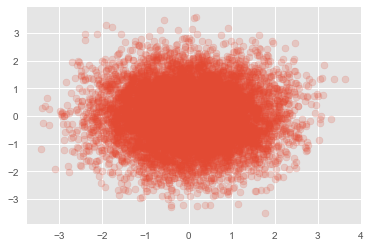

In [8]:
X, Y = RV(Normal(0,1)**2)
(X & Y).sim(10000).plot(alpha = 0.2)

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls

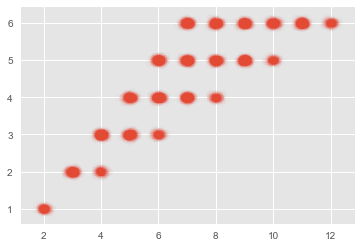

In [9]:
die = list(range(1, 6+1))
P = BoxModel(die, size = 2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).plot(jitter = True, alpha = 0.01)

Multiple scatterplots can be overlaid on the same plot.

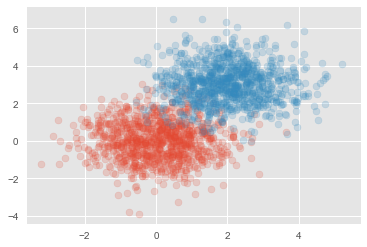

In [10]:
X, Y = RV(Normal(0,1)**2)
(X & Y).sim(1000).plot(alpha = 0.2)
((X+2) & (Y+3)).sim(1000).plot(alpha = 0.2)

<a id='rv'></a>

### Random vectors

A random variable maps an outcome in a probability space to a real number.  A *random vector* maps an outcome in a probability space to a vector of values.  For example, a roll of two dice could return the pair of values (sum of the rolls, larger of the rolls).  That is, each realization of a random vector is a tuple of values, rather than a single value. RV can be used to define random vectors as well and random variables.

In [11]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X.sim(3)

0,"(4, 0.597535532612724)"
1,"(5, -0.08088167807658433)"
2,"(1, -0.2534262170208223)"


Components of a random vector X can be accessed using brackets `[]`.  Note that Python starts the index at 0, so the first entry of a vector `X` is `X[0]`, the second entry is `X[1]`, etc.  Each component of a random vector is a random variable so indexing using brackets produces a random variable which can be manipulated accordingly.

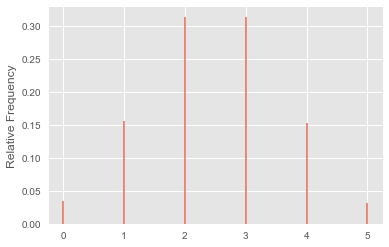

In [12]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X[0].sim(10000).plot()

Brackets can be used to access components of the random vector itself, or the simulated values of a random vector

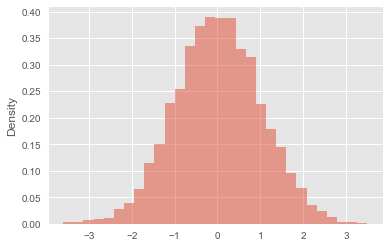

In [13]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X.sim(10000)[1].plot()

<a id='unpack'></a>

### "Unpacking"

Individual components of a random vector X can be accessed using brackets, e.g. X[0], X[1], etc.  When a problem involves only a few random variables, it is typical to denote them as e.g. $X, Y, Z$ (rather than X[0], X[1], X[2]).  Components of a random vector can be "unpacked" in this way when defining an RV.

*Example.* Let $X$, $Y$, and $Z$ be independent, with $X$ having a Binomial(5, 0.5) distribution, $Y$ a Normal(0,1) distribution, and $Z$ a Uniform(0,1) distribution.  The following two cells provide two ways this situation can be defined.  The first version is the "unpacked" definition which defines the three random variables.  The second defines a random vector and then accesses its components with brackets. 

0,"(1, -0.7668433636948989, 0.2004461753198591)"
1,"(2, -1.13797767675389, 0.7270260132421259)"
2,"(2, -1.8246295717297745, 0.7799843339867468)"
3,"(2, 2.528302432943067, 0.7473147623264974)"


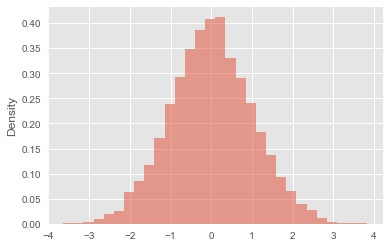

In [14]:
# unpacked version
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))
Y.sim(10000).plot()
(X & Y & Z).sim(4)

0,"(1, 0.041093695991059644, 0.5741840670065359)"
1,"(4, 0.8557042213869621, 0.46528392357957793)"
2,"(2, -1.6437664816132571, 0.24248755843990477)"
3,"(2, 0.2219182586615702, 0.2953945844182875)"


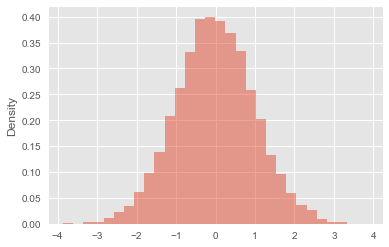

In [15]:
# vector version
X = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))
X[1].sim(10000).plot()
X.sim(4)

<a id='marginal'></a>

### Marginal distributions

Each component of a random vector is a random variable, so indexing using brackets or unpacking produces a random variable which can be manipulated accordingly.

When multiple random variables are simulated, applying `.mean()`, `.var()`, or `.sd()` returns the marginal means, variances, and standard deviations, respectively, of each of the random variables involved.

*Example.*  A vector of independent random variables.

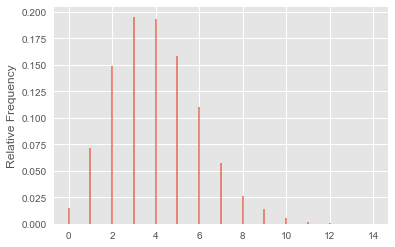

In [16]:
X = RV(Binomial(5, 0.5) * Normal(0, 1) * Poisson(4))
X[2].sim(10000).plot()

In [17]:
X.sim(10000).mean()

(2.5034000000000001, -0.025802754433046478, 3.9809999999999999)

In [18]:
X.sim(10000).sd()

(1.1361056288919484, 1.0104235829398462, 1.9908449562936994)

*Example.* A [multivariate normal](common_joint.html#mvn) example, with "unpacking".

In [19]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix))
xy = (X & Y).sim(10000)
xy.mean()

(0.0074237128076100334, 0.98300642097075119)

In [20]:
xy.var()

(0.99736095353688248, 4.0034119380271145)

<a id='cov'></a>

### Covariance

The covariance between random variables $X$ and $Y$, defined as
$$
Cov(X,Y) = E[(X-E(X))(Y-E(Y))],
$$
measures the degree of linear dependence between $X$ and $Y$.  Covariance can be approximated by simulating many pairs of values of the random variables and using `.cov()`.

*Example.*  Let $X$ be the minimum and $Y$ the maximum of two independent Uniform(0,1) random variables.  It can be shown that $Cov(X,Y) = 1/36$ (and the correlation is 1/2).

0.027501729932967973

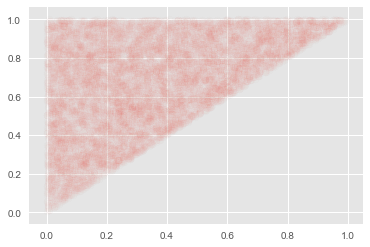

In [21]:
P = Uniform(a = 0, b = 1)**2
X = RV(P, min)
Y = RV(P, max)
xy = (X & Y).sim(10000)
plot(xy, alpha = 0.01)
xy.cov()

*Example.* A [multivariate normal](common_joint.html#mvn) example.

In [22]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix)) # see below for notes on "unpacking"
xy = (X & Y).sim(10000)
xy.cov()

-0.47897137539400297

When simulating more than two random variables, applying .cov() returns the covariance matrix of covariances between each pair of values (with the variances on the diagonal).

In [23]:
(X & Y & X+Y).sim(10000).cov()

array([[ 1.01147351, -0.49564139,  0.51583212],
       [-0.49564139,  3.93799488,  3.44235348],
       [ 0.51583212,  3.44235348,  3.9581856 ]])

<a id='corr'></a>

### Correlation

The **correlation coefficient** is a standardized measure of linear dependence which takes values in $[-1, 1]$.
$$
Corr(X,Y) = \frac{Cov (X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y}} = Cov\left(\frac{X - E(X)}{SD(X)},\frac{Y - E(Y)}{SD(Y)}\right)
$$
The correlation coefficient can be approximated by simulating many pairs of values and  using `.corr()`.

*Example.* A [bivariate normal](common_joint.html#bvn) example.

In [24]:
X, Y = RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = -0.25 ))
xy = (X & Y).sim(10000)
xy.corr()

-0.26257356979249913

When simulating more than two random variables, applying `.corr()` returns the correlation *matrix* of correlations between each pair of values (with 1s on the diagonal since a variable is perfectly correlated with itself).

In [25]:
(X & Y & X+Y).sim(10000).corr()

array([[ 1.        , -0.24934555,  0.25334385],
       [-0.24934555,  1.        ,  0.87365114],
       [ 0.25334385,  0.87365114,  1.        ]])

<a id='transform'></a>

### Transformations of random variables

Random variables are often defined as functions of other random variables.  In particular, arithmetic operations like addition, subtraction, multiplication, and division can be applied to random variables defined on the same probability space.

*Example.* Two soccer teams score goals independently of each other, team A according to a Poisson distribution with mean 2.3 goals per goal and team B according to a Poisson distribution with mean 1.7 goals per game.  Approximate the distribution of the total number of goals scored in a game.

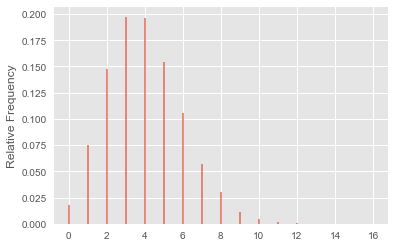

In [26]:
X, Y = RV(Poisson(lam = 2.3) * Poisson(lam = 1.7))
Z = X + Y
Z.sim(10000).plot()

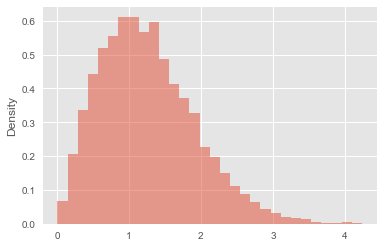

In [27]:
X, Y = RV(Normal(0,1)**2)
Z = sqrt(X**2 + Y**2)
Z.sim(10000).plot()

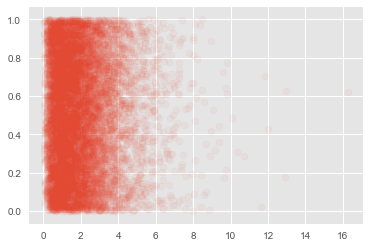

In [28]:
X, Y = RV(Exponential(1)**2)
W = X + Y
Z = X / W
plot((W & Z).sim(10000), alpha = 0.05)

<a id='caution'></a>
## A caution about working with multiple random variables

In order to manipulate multiple random variables simulultaneously, they must be defined on the sample probability space.  Otherwise, it would not be possible to determine the *relationship* between the random variables.  Note that the following code would produce an error because the random variables are not explicitly defined on the same probability space.  In particular, Symbulate has no way of determining the joint distribution of $X$ and $Y$.  The error can be fixed by adding `X, Y = AssumeIndependent(X, Y)` before the last line, after which the code would be equivalent to the code above in the soccer example above.

```
X = RV(Poisson(2.3))  
Y = RV(Poisson(1.7))  
(X + Y).sim(10000).plot()  
```

If it is desired to define [*independent* random variables](#def_ind_ran), the independence must be made explicit, either with the product syntax `*` (or `**`) or with `AssumeIndependent`.

< [Commonly used random processes](common_random.html) | [Contents](index.html) | [Conditioning](conditioning.html) >